In [1]:
import os

import math

import datetime as dt

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 31)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 31)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# 1_users_df

In [2]:
users_df = pd.read_csv(os.path.join('..', 'Quitbit', 'users.csv'), index_col = 'user_id')

In [3]:
users_df.head()

,email,timezone,birth_day,gender
user_id,,,,
32,peter_simpson@brown.edu,America/Los_Angeles,8/15/91,NaN
35,froeber@cox.net,America/Halifax,9/22/55,NaN
66,dqlizard@yahoo.com,Africa/Casablanca,1/25/82,NaN
89,mgraca@gmail.com,Europe/Amsterdam,NaN,NaN
138,bonnet.jerome@gmail.com,Africa/Casablanca,3/6/83,NaN


In [378]:
pd.get_dummies(users_df.gender)

,female,male
user_id,,
32,0,0
66,0,0
89,0,0
138,0,0
166,0,0
167,0,0
180,0,0
216,0,0
230,0,0


In [4]:
users_df.birth_day

user_id
32        8/15/91
35        9/22/55
66        1/25/82
89            NaN
138        3/6/83
166       10/4/75
167        9/2/92
180       10/4/72
216       1/27/85
230      12/31/85
16867         NaN
135       1/12/82
76         6/1/84
111           NaN
33        10/1/83
           ...   
14771         NaN
14741         NaN
14773         NaN
14777         NaN
14778         NaN
14779         NaN
14780         NaN
14774         NaN
14746         NaN
14765         NaN
14782         NaN
14783         NaN
14789         NaN
14781         NaN
14790         NaN
Name: birth_day, Length: 18434, dtype: object

In [5]:
users_df_bd = users_df[pd.notnull(users_df['birth_day'])]

In [6]:
users_df_bd.birth_day

user_id
32        8/15/91
35        9/22/55
66        1/25/82
138        3/6/83
166       10/4/75
167        9/2/92
180       10/4/72
216       1/27/85
230      12/31/85
135       1/12/82
76         6/1/84
33        10/1/83
55        8/16/94
61        8/18/83
219       9/28/95
           ...   
14680    10/15/95
14681    10/22/84
14685     8/22/67
14687     1/10/78
14690    10/14/78
14726     8/29/85
14716     8/13/85
14715    12/20/72
14729     4/17/91
14720     5/21/77
14769     6/13/89
14757     2/15/77
14760     6/26/98
14764      1/8/17
14770     7/18/78
Name: birth_day, Length: 5082, dtype: object

In [7]:
users_df_bd.birth_day.describe()

count        5082
unique       4054
top       2/11/73
freq           26
Name: birth_day, dtype: object

In [8]:
# Create 'age' from 'birth_day'

users_df['birth_day'] = pd.to_datetime(users_df['birth_day'], format='%m/%d/%y')

In [9]:
users_df.birth_day.apply(lambda birth_day_year: birth_day_year.year)

user_id
32       1991.0
35       2055.0
66       1982.0
89          NaN
138      1983.0
166      1975.0
167      1992.0
180      1972.0
216      1985.0
230      1985.0
16867       NaN
135      1982.0
76       1984.0
111         NaN
33       1983.0
          ...  
14771       NaN
14741       NaN
14773       NaN
14777       NaN
14778       NaN
14779       NaN
14780       NaN
14774       NaN
14746       NaN
14765       NaN
14782       NaN
14783       NaN
14789       NaN
14781       NaN
14790       NaN
Name: birth_day, Length: 18434, dtype: float64

In [10]:
users_df['birth_year'] = users_df.birth_day.apply(lambda birth_day_year: birth_day_year.year)

In [11]:
users_df.head()

,email,timezone,birth_day,gender,birth_year
user_id,,,,,
32,peter_simpson@brown.edu,America/Los_Angeles,1991-08-15,NaN,1991.0
35,froeber@cox.net,America/Halifax,2055-09-22,NaN,2055.0
66,dqlizard@yahoo.com,Africa/Casablanca,1982-01-25,NaN,1982.0
89,mgraca@gmail.com,Europe/Amsterdam,NaT,NaN,NaN
138,bonnet.jerome@gmail.com,Africa/Casablanca,1983-03-06,NaN,1983.0


In [12]:
users_df['age'] = 2017 - users_df.birth_year

In [13]:
users_df.head()

,email,timezone,birth_day,gender,birth_year,age
user_id,,,,,,
32,peter_simpson@brown.edu,America/Los_Angeles,1991-08-15,NaN,1991.0,26.0
35,froeber@cox.net,America/Halifax,2055-09-22,NaN,2055.0,-38.0
66,dqlizard@yahoo.com,Africa/Casablanca,1982-01-25,NaN,1982.0,35.0
89,mgraca@gmail.com,Europe/Amsterdam,NaT,NaN,NaN,NaN
138,bonnet.jerome@gmail.com,Africa/Casablanca,1983-03-06,NaN,1983.0,34.0


In [14]:
users_df.age.describe()

count    5082.000000
mean       24.274892
std        22.709737
min       -51.000000
25%        24.000000
50%        29.000000
75%        36.000000
max        48.000000
Name: age, dtype: float64

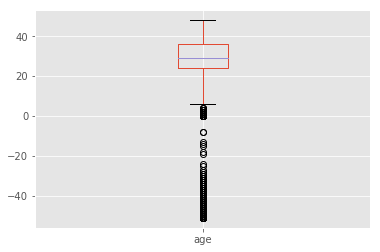

In [15]:
users_df.age.plot(kind = 'box')

In [16]:
# Age: remove outliers

age_Q1 = users_df.age.quantile(0.25)
age_Q3 = users_df.age.quantile(0.75)

IQR = age_Q3 - age_Q1

IQR

12.0

In [17]:
users_df[users_df.age < age_Q1 - 1.5 * IQR].shape[0]

576

In [18]:
users_df[users_df.age > age_Q3 + 1.5 * IQR].shape[0]

0

In [19]:
users_df.drop(users_df[users_df.age > age_Q3 + 1.5 * IQR].index, inplace = True)

In [20]:
users_df.shape[0]

18434

In [21]:
users_df.drop(users_df[users_df.age < age_Q1 - 1.5 * IQR].index, inplace = True)

In [22]:
users_df.shape[0]

17858

In [23]:
users_df.age.describe()

count    4506.000000
mean       31.562139
std         7.641163
min         6.000000
25%        26.000000
50%        31.000000
75%        37.000000
max        48.000000
Name: age, dtype: float64

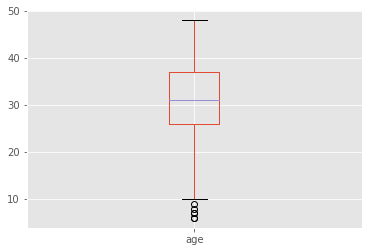

In [24]:
users_df.age.plot(kind = 'box')

In [25]:
# Note: still few age values below 10 years; there could be something up with the year inputs (worth checking)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10bdb6350>]], dtype=object)

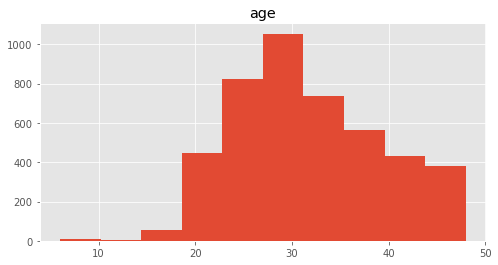

In [26]:
users_df[ ['age'] ].hist(figsize = (8, 4))

In [27]:
# Create dummy variables for 'gender'

In [28]:
users_df_g = users_df[pd.notnull(users_df['gender'])]

In [29]:
users_df_g.gender.describe()

count     5340
unique       2
top       male
freq      3116
Name: gender, dtype: object

In [30]:
users_df_g.gender.value_counts()

male      3116
female    2224
Name: gender, dtype: int64

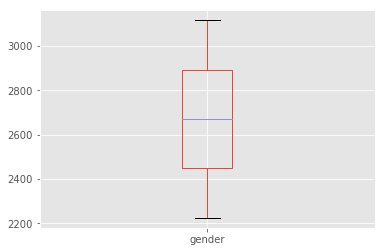

In [31]:
users_df_g.gender.value_counts().plot(kind = 'box')

# 2_smokes_df

In [32]:
smokes_df = pd.read_csv(os.path.join('..', 'Quitbit', 'smokes.csv'), index_col = 'user_id')

/Users/juliewang/anaconda/lib/python2.7/site-packages/numpy/lib/arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [33]:
smokes_df.head()

,id,timestamp
user_id,,
31,4107,6/5/14 18:14
32,4108,6/6/14 22:03
33,4109,6/7/14 0:30
33,4110,6/29/14 18:25
33,4111,6/29/14 22:00


In [34]:
pd.to_datetime(smokes_df.timestamp)

user_id
31      2014-06-05 18:14:00
32      2014-06-06 22:03:00
33      2014-06-07 00:30:00
33      2014-06-29 18:25:00
33      2014-06-29 22:00:00
33      2014-06-30 15:14:00
33      2014-06-30 20:00:00
33      2014-06-30 22:20:00
33      2014-07-01 12:22:00
33      2014-07-01 15:59:00
33      2014-07-01 19:58:00
33      2014-07-02 01:27:00
33      2014-07-02 14:48:00
33      2014-07-02 19:35:00
33      2014-07-02 23:53:00
                ...        
11666   2016-11-12 15:15:00
13387   2016-11-12 15:27:00
2714    2016-11-12 15:31:00
8207    2016-11-12 15:42:00
12800   2016-11-12 15:50:00
11990   2016-11-12 16:20:00
8207    2016-11-12 16:37:00
4942    2016-11-12 16:45:00
9871    2016-11-12 17:22:00
9848    2016-11-12 17:29:00
13337   2016-11-12 17:45:00
8671    2016-11-12 17:49:00
5574    2016-11-12 17:53:00
9656    2016-11-12 17:03:00
9656    2016-11-12 18:00:00
Name: timestamp, Length: 1048575, dtype: datetime64[ns]

In [35]:
smokes_df.timestamp = pd.to_datetime(smokes_df.timestamp)

In [36]:
smokes_df.timestamp.apply(lambda time_stamp: time_stamp.year)

user_id
31       2014
32       2014
33       2014
33       2014
33       2014
33       2014
33       2014
33       2014
33       2014
33       2014
33       2014
33       2014
33       2014
33       2014
33       2014
         ... 
11666    2016
13387    2016
2714     2016
8207     2016
12800    2016
11990    2016
8207     2016
4942     2016
9871     2016
9848     2016
13337    2016
8671     2016
5574     2016
9656     2016
9656     2016
Name: timestamp, Length: 1048575, dtype: int64

In [37]:
smokes_df[ 'date' ] = smokes_df.timestamp.apply(lambda time_stamp: time_stamp.date)
smokes_df[ 'year' ] = smokes_df.timestamp.apply(lambda time_stamp: time_stamp.year)
smokes_df[ 'month' ] = smokes_df.timestamp.apply(lambda time_stamp: time_stamp.month)
smokes_df[ 'day' ] = smokes_df.timestamp.apply(lambda time_stamp: time_stamp.day)
smokes_df[ 'dayofweek' ] = smokes_df.timestamp.apply(lambda time_stamp: time_stamp.weekday_name)
smokes_df[ 'hourofday' ] = smokes_df.timestamp.apply(lambda time_stamp: time_stamp.hour)

In [38]:
smokes_df.head()

,id,timestamp,date,year,month,day,dayofweek,hourofday
user_id,,,,,,,,
31,4107,2014-06-05 18:14:00,<built-in method date of Timestamp object at 0...,2014,6,5,Thursday,18
32,4108,2014-06-06 22:03:00,<built-in method date of Timestamp object at 0...,2014,6,6,Friday,22
33,4109,2014-06-07 00:30:00,<built-in method date of Timestamp object at 0...,2014,6,7,Saturday,0
33,4110,2014-06-29 18:25:00,<built-in method date of Timestamp object at 0...,2014,6,29,Sunday,18
33,4111,2014-06-29 22:00:00,<built-in method date of Timestamp object at 0...,2014,6,29,Sunday,22


In [39]:
smokes_df['just_date'] = smokes_df['timestamp'].dt.date

In [40]:
smokes_df.head()

,id,timestamp,date,year,month,day,dayofweek,hourofday,just_date
user_id,,,,,,,,,
31,4107,2014-06-05 18:14:00,<built-in method date of Timestamp object at 0...,2014,6,5,Thursday,18,2014-06-05
32,4108,2014-06-06 22:03:00,<built-in method date of Timestamp object at 0...,2014,6,6,Friday,22,2014-06-06
33,4109,2014-06-07 00:30:00,<built-in method date of Timestamp object at 0...,2014,6,7,Saturday,0,2014-06-07
33,4110,2014-06-29 18:25:00,<built-in method date of Timestamp object at 0...,2014,6,29,Sunday,18,2014-06-29
33,4111,2014-06-29 22:00:00,<built-in method date of Timestamp object at 0...,2014,6,29,Sunday,22,2014-06-29


In [271]:
# Without "cleaning" any data

smokes_df.groupby('user_id').just_date.value_counts().describe()

count    111214.000000
mean          9.428444
std           7.950617
min           1.000000
25%           4.000000
50%           8.000000
75%          13.000000
max         999.000000
Name: just_date, dtype: float64

In [42]:
smokes_df.timestamp.value_counts()

2015-02-24 13:21:00    128
2015-02-27 17:51:00    127
2015-02-27 17:54:00    121
2015-02-24 13:22:00    118
2015-02-27 17:50:00    109
2015-02-27 17:55:00    107
2015-02-27 17:48:00    106
2015-02-27 17:49:00    101
2015-02-27 17:53:00    100
2015-03-18 12:26:00     98
2015-02-27 17:52:00     90
2015-02-27 17:47:00     89
2015-02-26 09:23:00     85
2015-07-11 15:52:00     77
2015-04-13 17:39:00     76
                      ... 
2015-10-20 07:04:00      1
2016-04-03 01:09:00      1
2015-09-21 04:17:00      1
2016-11-02 01:58:00      1
2016-09-03 19:55:00      1
2015-10-28 20:22:00      1
2015-01-06 09:47:00      1
2016-03-05 08:06:00      1
2016-08-08 07:07:00      1
2015-06-05 21:02:00      1
2016-08-12 18:50:00      1
2016-05-18 01:54:00      1
2016-10-02 01:40:00      1
2015-05-31 09:07:00      1
2016-03-25 10:52:00      1
Name: timestamp, Length: 558602, dtype: int64

In [43]:
smokes_df.month.value_counts()

1     116040
10    104108
2     100753
3      97656
9      90019
4      82714
5      82009
11     77883
8      76920
12     75927
7      74066
6      70480
Name: month, dtype: int64

In [44]:
smokes_df.day.value_counts()

27    35749
22    35615
24    35409
23    35381
11    35190
5     35052
6     35026
7     35013
26    34907
8     34826
25    34675
10    34545
12    34444
28    34438
4     34392
9     34379
20    34288
18    34256
13    34188
19    33969
1     33945
14    33929
16    33832
3     33818
15    33817
2     33649
21    33553
29    33062
17    33021
30    30422
31    19785
Name: day, dtype: int64

In [45]:
smokes_df.dayofweek.value_counts()

Tuesday      158357
Wednesday    156566
Monday       155448
Thursday     154358
Friday       150736
Saturday     137444
Sunday       135666
Name: dayofweek, dtype: int64

In [46]:
smokes_df['just_hour'] = smokes_df['timestamp'].dt.hour

In [47]:
smokes_df

,id,timestamp,date,year,month,day,dayofweek,hourofday,just_date,just_hour
user_id,,,,,,,,,,
31,4107,2014-06-05 18:14:00,<built-in method date of Timestamp object at 0...,2014,6,5,Thursday,18,2014-06-05,18
32,4108,2014-06-06 22:03:00,<built-in method date of Timestamp object at 0...,2014,6,6,Friday,22,2014-06-06,22
33,4109,2014-06-07 00:30:00,<built-in method date of Timestamp object at 0...,2014,6,7,Saturday,0,2014-06-07,0
33,4110,2014-06-29 18:25:00,<built-in method date of Timestamp object at 0...,2014,6,29,Sunday,18,2014-06-29,18
33,4111,2014-06-29 22:00:00,<built-in method date of Timestamp object at 0...,2014,6,29,Sunday,22,2014-06-29,22
33,4112,2014-06-30 15:14:00,<built-in method date of Timestamp object at 0...,2014,6,30,Monday,15,2014-06-30,15
33,4113,2014-06-30 20:00:00,<built-in method date of Timestamp object at 0...,2014,6,30,Monday,20,2014-06-30,20
33,4114,2014-06-30 22:20:00,<built-in method date of Timestamp object at 0...,2014,6,30,Monday,22,2014-06-30,22
33,4115,2014-07-01 12:22:00,<built-in method date of Timestamp object at 0...,2014,7,1,Tuesday,12,2014-07-01,12


In [257]:
smokes_df.just_hour.value_counts()

17    56031
16    55719
15    54605
18    54569
19    53559
20    52832
14    52649
13    51911
21    50848
12    48987
22    45877
11    43663
23    42263
0     39357
10    37641
1     37450
2     36081
9     34881
3     34467
4     33946
7     33078
8     32928
6     32879
5     32354
Name: just_hour, dtype: int64

In [49]:
smokes_df['just_time'] = smokes_df['timestamp'].dt.time

In [50]:
pd.get_dummies(smokes_df, prefix=['gender']).head()

,id,timestamp,date,year,month,day,dayofweek,hourofday,just_date,just_hour,just_time
user_id,,,,,,,,,,,
31,4107,2014-06-05 18:14:00,<built-in method date of Timestamp object at 0...,2014,6,5,Thursday,18,2014-06-05,18,18:14:00
32,4108,2014-06-06 22:03:00,<built-in method date of Timestamp object at 0...,2014,6,6,Friday,22,2014-06-06,22,22:03:00
33,4109,2014-06-07 00:30:00,<built-in method date of Timestamp object at 0...,2014,6,7,Saturday,0,2014-06-07,0,00:30:00
33,4110,2014-06-29 18:25:00,<built-in method date of Timestamp object at 0...,2014,6,29,Sunday,18,2014-06-29,18,18:25:00
33,4111,2014-06-29 22:00:00,<built-in method date of Timestamp object at 0...,2014,6,29,Sunday,22,2014-06-29,22,22:00:00


# Create primary outcome variable: # reduction (next calculate % reduction)

In [254]:
smokes_df.index.unique()

Int64Index([   31,    32,    33,    34,    35,    37,    38,    40,    39,
               43,
            ...
            13447, 13463, 13460, 13459, 13462, 13467, 13472, 13374, 13469,
            13468],
           dtype='int64', name=u'user_id', length=10483)

In [231]:
# Create change in day 1 number of lights to day last number of lights
# First and last day (later subset and use average of first 3 and average of last 3)

l = []

for user_id in smokes_df.index.unique():
    df = smokes_df[smokes_df.index == user_id].sort_values(by = 'just_date', ascending = True)
    first = df.iloc[0].just_date
    df = df[df.just_date == first]
    start = len(df)
    
    df = smokes_df[smokes_df.index == user_id].sort_values(by = 'just_date', ascending = False)
    last = df.iloc[0].just_date
    df = df[df.just_date == last]
    finish = len(df)
    
    l.append((user_id, start - finish))

In [232]:
user_ids = pd.DataFrame({'user_id': map(lambda x: x[0], l), 'delta': map(lambda x: x[1], l)})

In [233]:
user_ids

,delta,user_id
0,-6,31
1,0,32
2,8,33
3,-1,34
4,-2,35
5,0,37
6,0,38
7,0,40
8,-2,39
9,0,43


In [246]:
user_ids.delta.describe()

count    10483.000000
mean         1.273872
std          5.853085
min       -114.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        103.000000
Name: delta, dtype: float64

In [273]:
# Take out outliers

Q1 = user_ids.delta.quantile(0.25)
Q3 = user_ids.delta.quantile(0.75)

IQR = Q3 - Q1

IQR

2.0

In [275]:
user_ids[user_ids.delta < Q1 - 1.5 * IQR].shape[0]

580

In [276]:
user_ids[user_ids.delta > Q3 + 1.5 * IQR].shape[0]

1336

In [278]:
user_ids.drop(user_ids[user_ids.delta < Q1 - 1.5 * IQR].index, inplace = True)

In [279]:
user_ids.drop(user_ids[user_ids.delta > Q3 + 1.5 * IQR].index, inplace = True)

In [280]:
user_ids.shape[0]

8567

In [283]:
user_ids.delta.describe()

count    8567.000000
mean        0.444847
std         1.481369
min        -3.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.000000
Name: delta, dtype: float64

In [284]:
# Drop EXTREME Outliers
user_ids[user_ids.delta < Q1 - 3 * IQR].shape[0]

0

In [285]:
user_ids[user_ids.delta > Q3 + 3 * IQR].shape[0]

0

In [290]:
smokes_df.head()

,id,timestamp,date,year,month,day,dayofweek,hourofday,just_date,just_hour,just_time
user_id,,,,,,,,,,,
31,4107,2014-06-05 18:14:00,<built-in method date of Timestamp object at 0...,2014,6,5,Thursday,18,2014-06-05,18,18:14:00
32,4108,2014-06-06 22:03:00,<built-in method date of Timestamp object at 0...,2014,6,6,Friday,22,2014-06-06,22,22:03:00
33,4109,2014-06-07 00:30:00,<built-in method date of Timestamp object at 0...,2014,6,7,Saturday,0,2014-06-07,0,00:30:00
33,4110,2014-06-29 18:25:00,<built-in method date of Timestamp object at 0...,2014,6,29,Sunday,18,2014-06-29,18,18:25:00
33,4111,2014-06-29 22:00:00,<built-in method date of Timestamp object at 0...,2014,6,29,Sunday,22,2014-06-29,22,22:00:00


In [291]:
smokes_df['delta'] = user_ids.delta 

In [295]:
smokes_df

,id,timestamp,date,year,month,day,dayofweek,hourofday,just_date,just_hour,just_time,delta
user_id,,,,,,,,,,,,
31,4107,2014-06-05 18:14:00,<built-in method date of Timestamp object at 0...,2014,6,5,Thursday,18,2014-06-05,18,18:14:00,NaN
32,4108,2014-06-06 22:03:00,<built-in method date of Timestamp object at 0...,2014,6,6,Friday,22,2014-06-06,22,22:03:00,2.0
33,4109,2014-06-07 00:30:00,<built-in method date of Timestamp object at 0...,2014,6,7,Saturday,0,2014-06-07,0,00:30:00,NaN
33,4110,2014-06-29 18:25:00,<built-in method date of Timestamp object at 0...,2014,6,29,Sunday,18,2014-06-29,18,18:25:00,NaN
33,4111,2014-06-29 22:00:00,<built-in method date of Timestamp object at 0...,2014,6,29,Sunday,22,2014-06-29,22,22:00:00,NaN
33,4112,2014-06-30 15:14:00,<built-in method date of Timestamp object at 0...,2014,6,30,Monday,15,2014-06-30,15,15:14:00,NaN
33,4113,2014-06-30 20:00:00,<built-in method date of Timestamp object at 0...,2014,6,30,Monday,20,2014-06-30,20,20:00:00,NaN
33,4114,2014-06-30 22:20:00,<built-in method date of Timestamp object at 0...,2014,6,30,Monday,22,2014-06-30,22,22:20:00,NaN
33,4115,2014-07-01 12:22:00,<built-in method date of Timestamp object at 0...,2014,7,1,Tuesday,12,2014-07-01,12,12:22:00,NaN


In [294]:
smokes_df.delta.describe()

count    754318.000000
mean          0.460554
std           1.539141
min          -3.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           5.000000
Name: delta, dtype: float64

In [345]:
smokes_df_dropna = smokes_df.dropna(subset = ['delta'])

In [350]:
smokes_df_dropna.delta.value_counts()

 0.0    505870
 2.0     43707
-1.0     42135
 4.0     39859
 3.0     33213
 1.0     32023
 5.0     20741
-3.0     19138
-2.0     17632
Name: delta, dtype: int64

In [348]:
smokes_df_dropna.delta.describe()

count    754318.000000
mean          0.460554
std           1.539141
min          -3.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           5.000000
Name: delta, dtype: float64

# 3_settings_df

In [494]:
settings_df = pd.read_csv(os.path.join('..', 'Quitbit', 'settings.csv'), index_col = 'user_id')

In [495]:
settings_df.head()

,cigs_smoked_per_day,goal_cigs_per_day,goal_date,goal_date_setted_date,years_smoked,quitplan_id
user_id,,,,,,
31,8.0,0,11/30/15,11/10/15,0.0,49.0
32,10.0,5,11/13/15,11/09/15,2.0,50.0
33,8.0,1,03/24/16,02/26/16,2.0,51.0
34,20.0,0,10/31/15,10/06/15,20.0,52.0
35,10.0,0,12/31/69,04/30/16,1.0,NaN


# Merge users_df, smokes_df, and settings_df

In [496]:
merge_df = users_df.merge(smokes_df, left_index = True, right_index = True)

In [497]:
merge_df_2 = merge_df.merge(settings_df, left_index = True, right_index = True)

In [498]:
merge_df_2.head()

,email,timezone,birth_day,gender,birth_year,age,id,timestamp,date,year,month,day,dayofweek,hourofday,just_date,just_hour,just_time,delta,cigs_smoked_per_day,goal_cigs_per_day,goal_date,goal_date_setted_date,years_smoked,quitplan_id
user_id,,,,,,,,,,,,,,,,,,,,,,,,
31,test@test.com,America/Los_Angeles,NaT,NaN,NaN,NaN,4107,2014-06-05 18:14:00,<built-in method date of Timestamp object at 0...,2014,6,5,Thursday,18,2014-06-05,18,18:14:00,NaN,8.0,0,11/30/15,11/10/15,0.0,49.0
31,test@test.com,America/Los_Angeles,NaT,NaN,NaN,NaN,339034,2015-12-16 23:28:00,<built-in method date of Timestamp object at 0...,2015,12,16,Wednesday,23,2015-12-16,23,23:28:00,NaN,8.0,0,11/30/15,11/10/15,0.0,49.0
31,test@test.com,America/Los_Angeles,NaT,NaN,NaN,NaN,339051,2015-12-16 23:50:00,<built-in method date of Timestamp object at 0...,2015,12,16,Wednesday,23,2015-12-16,23,23:50:00,NaN,8.0,0,11/30/15,11/10/15,0.0,49.0
31,test@test.com,America/Los_Angeles,NaT,NaN,NaN,NaN,339052,2015-12-16 23:52:00,<built-in method date of Timestamp object at 0...,2015,12,16,Wednesday,23,2015-12-16,23,23:52:00,NaN,8.0,0,11/30/15,11/10/15,0.0,49.0
31,test@test.com,America/Los_Angeles,NaT,NaN,NaN,NaN,339060,2015-12-16 23:55:00,<built-in method date of Timestamp object at 0...,2015,12,16,Wednesday,23,2015-12-16,23,23:55:00,NaN,8.0,0,11/30/15,11/10/15,0.0,49.0


In [499]:
# deleting test user
merge_df_2.drop(['31'])

merge_df_2 = merge_df_2.drop(['31']) 

In [552]:
merge_df_2.delta.describe()

count    685937.000000
mean          0.432446
std           1.526770
min          -3.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           5.000000
Name: delta, dtype: float64

In [502]:
# Non-NaN values
merge_df_2.count()

email                    956337
timezone                 956337
birth_day                434517
gender                   194235
birth_year               434517
age                      434517
id                       956337
timestamp                956337
date                     956337
year                     956337
month                    956337
day                      956337
dayofweek                956337
hourofday                956337
just_date                956337
just_hour                956337
just_time                956337
delta                    685937
cigs_smoked_per_day      956167
goal_cigs_per_day        956337
goal_date                954895
goal_date_setted_date    956337
years_smoked             955825
quitplan_id              734088
dtype: int64

In [503]:
# subset columns (no timestamp data)
df3 = merge_df_2[ ['gender', 'age', 'delta', 'years_smoked', 'cigs_smoked_per_day', 'goal_cigs_per_day', 'quitplan_id' ] ]

In [553]:
df3.duplicated().sum()

0

In [505]:
df3[df3.duplicated()]

,gender,age,delta,years_smoked,cigs_smoked_per_day,goal_cigs_per_day,quitplan_id
user_id,,,,,,,
32,NaN,26.0,2.0,2.0,10.0,5,50.0
33,NaN,34.0,NaN,2.0,8.0,1,51.0
33,NaN,34.0,NaN,2.0,8.0,1,51.0
33,NaN,34.0,NaN,2.0,8.0,1,51.0
33,NaN,34.0,NaN,2.0,8.0,1,51.0
33,NaN,34.0,NaN,2.0,8.0,1,51.0
33,NaN,34.0,NaN,2.0,8.0,1,51.0
33,NaN,34.0,NaN,2.0,8.0,1,51.0
33,NaN,34.0,NaN,2.0,8.0,1,51.0


In [506]:
df3.drop_duplicates(inplace = True)

/Users/juliewang/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [507]:
df3.duplicated().sum()

0

In [508]:
df3

,gender,age,delta,years_smoked,cigs_smoked_per_day,goal_cigs_per_day,quitplan_id
user_id,,,,,,,
32,NaN,26.0,2.0,2.0,10.0,5,50.0
33,NaN,34.0,NaN,2.0,8.0,1,51.0
34,NaN,30.0,NaN,20.0,20.0,0,52.0
40,NaN,22.0,NaN,2.0,22.0,0,55.0
43,NaN,20.0,4.0,0.0,18.0,0,56.0
44,NaN,25.0,NaN,2.0,20.0,1,57.0
45,NaN,NaN,NaN,0.0,0.0,0,NaN
49,NaN,39.0,0.0,20.0,20.0,5,9881.0
50,NaN,32.0,0.0,12.0,20.0,15,59.0


In [511]:
corr = df3.corr()

corr

,age,delta,years_smoked,cigs_smoked_per_day,goal_cigs_per_day,quitplan_id
age,1.000000,-0.007864,0.046576,0.085720,0.064404,-0.005112
delta,-0.007864,1.000000,0.008300,0.007389,0.011376,-0.000679
years_smoked,0.046576,0.008300,1.000000,0.000188,0.014463,-0.060554
cigs_smoked_per_day,0.085720,0.007389,0.000188,1.000000,0.080400,0.020913
goal_cigs_per_day,0.064404,0.011376,0.014463,0.080400,1.000000,0.028826
quitplan_id,-0.005112,-0.000679,-0.060554,0.020913,0.028826,1.000000


In [513]:
df3.describe()

,age,delta,years_smoked,cigs_smoked_per_day,goal_cigs_per_day,quitplan_id
count,2797.000000,4587.000000,7248.000000,7255.000000,7261.000000,6368.000000
mean,31.806936,0.453891,8.967577,17.909028,2.176973,4309.568153
std,7.616612,1.490118,109.045982,52.319091,4.373877,2738.167405
min,6.000000,-3.000000,0.000000,0.000000,0.000000,50.000000
25%,26.000000,0.000000,0.000000,10.000000,0.000000,2073.750000
50%,31.000000,0.000000,0.000000,15.000000,0.000000,4220.500000
75%,38.000000,0.000000,10.000000,20.000000,3.000000,6256.250000
max,48.000000,5.000000,7300.000000,2555.000000,40.000000,15242.000000


In [514]:
# remove outliers from each of these variables
Q1_age = df3.age.quantile(0.25)
Q3_age = df3.age.quantile(0.75)

IQR_age = Q3_age - Q1_age

IQR_age

12.0

In [515]:
df3[df3.age < Q1_age - 1.5 * IQR].shape[0]

293

In [516]:
df3[df3.age < Q3_age + 1.5 * IQR].shape[0]

2360

In [517]:
df3.drop(df3[df3.age < Q1_age - 1.5 * IQR].index, inplace = True)

/Users/juliewang/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [527]:
df3.drop(df3[df3.age > Q3_age + 1.5 * IQR].index, inplace = True)

/Users/juliewang/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [531]:
df3.age.describe()

count    308.000000
mean      25.818182
std        2.041761
min       23.000000
25%       24.000000
50%       26.000000
75%       27.000000
max       29.000000
Name: age, dtype: float64

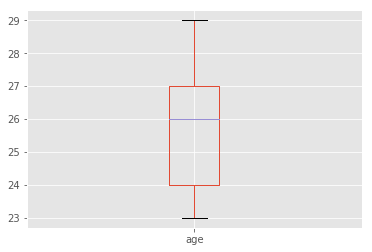

In [533]:
df3.age.plot(kind = 'box')

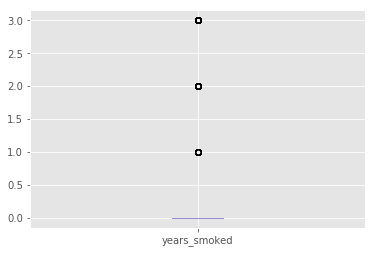

In [534]:
df3.years_smoked.plot(kind = 'box')

In [535]:
Q1_years_smoked = df3.years_smoked.quantile(0.25)
Q3_years_smoked = df3.years_smoked.quantile(0.75)

IQR_years_smoked = Q3_years_smoked - Q1_years_smoked

IQR_years_smoked

0.0

In [536]:
df3.drop(df3[df3.years_smoked < Q1_years_smoked - 1.5 * IQR].index, inplace = True)

/Users/juliewang/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [537]:
df3.drop(df3[df3.years_smoked > Q1_years_smoked + 1.5 * IQR].index, inplace = True)

/Users/juliewang/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [538]:
df3.years_smoked.describe()

count    3802.000000
mean        0.142557
std         0.576834
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.000000
Name: years_smoked, dtype: float64

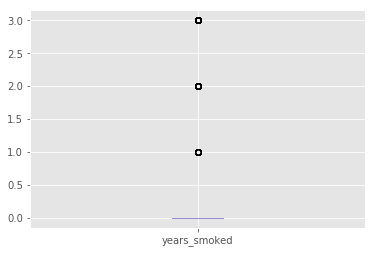

In [539]:
df3.years_smoked.plot(kind = 'box')

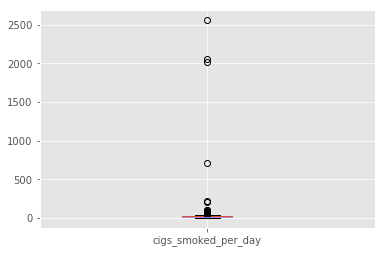

In [540]:
df3.cigs_smoked_per_day.plot(kind = 'box')

In [541]:
Q1_cigs_smoked_per_day = df3.cigs_smoked_per_day.quantile(0.25)
Q3_cigs_smoked_per_day = df3.cigs_smoked_per_day.quantile(0.75)

IQR_cigs_smoked_per_day = Q3_cigs_smoked_per_day - Q1_cigs_smoked_per_day

IQR_cigs_smoked_per_day

10.0

In [542]:
df3.drop(df3[df3.cigs_smoked_per_day < Q1_cigs_smoked_per_day - 1.5 * IQR].index, inplace = True)

/Users/juliewang/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [543]:
df3.drop(df3[df3.cigs_smoked_per_day > Q1_cigs_smoked_per_day + 1.5 * IQR].index, inplace = True)

/Users/juliewang/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [544]:
df3.cigs_smoked_per_day.describe()

count    943.000000
mean       9.956522
std        1.563659
min        7.000000
25%       10.000000
50%       10.000000
75%       10.000000
max       13.000000
Name: cigs_smoked_per_day, dtype: float64

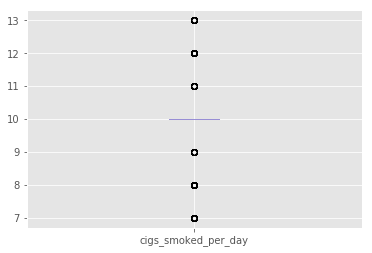

In [545]:
df3.cigs_smoked_per_day.plot(kind = 'box')

In [546]:
df3.corr()

,age,delta,years_smoked,cigs_smoked_per_day,goal_cigs_per_day,quitplan_id
age,1.000000,-0.130359,-0.234708,0.066471,0.019981,0.214420
delta,-0.130359,1.000000,-0.023798,0.007799,0.004966,0.002211
years_smoked,-0.234708,-0.023798,1.000000,-0.030535,0.012688,-0.417852
cigs_smoked_per_day,0.066471,0.007799,-0.030535,1.000000,0.087835,0.066652
goal_cigs_per_day,0.019981,0.004966,0.012688,0.087835,1.000000,-0.015721
quitplan_id,0.214420,0.002211,-0.417852,0.066652,-0.015721,1.000000


In [549]:
df3.describe()

,age,delta,years_smoked,cigs_smoked_per_day,goal_cigs_per_day,quitplan_id
count,94.000000,548.000000,942.000000,943.000000,945.00000,894.000000
mean,25.808511,0.536496,0.230361,9.956522,1.35873,5125.656600
std,2.171549,1.442544,0.728217,1.563659,2.32283,2220.939059
min,23.000000,-3.000000,0.000000,7.000000,0.00000,50.000000
25%,23.000000,0.000000,0.000000,10.000000,0.00000,3693.750000
50%,26.000000,0.000000,0.000000,10.000000,0.00000,5114.000000
75%,27.750000,0.000000,0.000000,10.000000,2.00000,6626.500000
max,29.000000,5.000000,3.000000,13.000000,10.00000,15135.000000


In [551]:
df3.groupby('age').delta.describe()

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
23.0,16.0,1.312500,1.990603,0.0,0.00,0.0,1.5,5.0
24.0,6.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0
25.0,4.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0
26.0,4.0,0.250000,1.258306,-1.0,-0.25,0.0,0.5,2.0
27.0,10.0,1.200000,1.475730,0.0,0.00,0.5,2.0,4.0
28.0,7.0,0.857143,1.573592,0.0,0.00,0.0,1.0,4.0
29.0,6.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0


In [556]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

import scipy.stats as stats

In [559]:
def Xy(df3):
    X = df3[ ['years_smoked']]
    
    y = df3.delta
    
    return X, y

X, y = Xy(df3)

model = smf.OLS(y, X).fit()

model.summary()

/Users/juliewang/anaconda/lib/python2.7/site-packages/numpy/linalg/linalg.py:1574: RuntimeWarning: invalid value encountered in greater
  return (S > tol).sum(axis=-1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  delta   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 29 Aug 2017   Prob (F-statistic):                nan
Time:                        15:22:35   Log-Likelihood:                    nan
No. Observations:                 945   AIC:                               nan
Df Residuals:                     945   BIC:                               nan
Df Model:                          -1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
years_smoked        nan        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                          nan
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [561]:
def Xy_2(df3):
    df3 = df3.dropna(subset = ['delta', 'years_smoked'])
    X = df3[ ['years_smoked'] ] 
    
    y = df3.delta
    
    return X, y

X, y = Xy_2(df3)

model = smf.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  delta   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     5.618
Date:                Tue, 29 Aug 2017   Prob (F-statistic):             0.0181
Time:                        15:25:53   Log-Likelihood:                -1006.6
No. Observations:                 545   AIC:                             2015.
Df Residuals:                     544   BIC:                             2019.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
years_smoked     0.1743      0.074      2.370      0.018       0.030       0.319
==============================================================================
Omnibus:                      163.957   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              359.281
Skew:                           1.623   Prob(JB):                     9.62e-79
Kurtosis:                       5.298   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [562]:
def Xy_2(df3):
    df3 = df3.dropna(subset = ['delta', 'cigs_smoked_per_day'])
    X = df3[ ['cigs_smoked_per_day'] ] 
    
    y = df3.delta
    
    return X, y

X, y = Xy_2(df3)

model = smf.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  delta   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     74.38
Date:                Tue, 29 Aug 2017   Prob (F-statistic):           7.04e-17
Time:                        15:27:02   Log-Likelihood:                -975.80
No. Observations:                 546   AIC:                             1954.
Df Residuals:                     545   BIC:                             1958.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
cigs_smoked_per_day     0.0532      0.006      8.624      0.000       0.041       0.065
==============================================================================
Omnibus:                      165.865   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              368.769
Skew:                           1.629   Prob(JB):                     8.37e-81
Kurtosis:                       5.364   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [564]:
df3.head()

,gender,age,delta,years_smoked,cigs_smoked_per_day,goal_cigs_per_day,quitplan_id
user_id,,,,,,,
32,NaN,26.0,2.0,2.0,10.0,5,50.0
55,NaN,23.0,0.0,2.0,10.0,6,11282.0
125,NaN,27.0,NaN,3.0,10.0,0,93.0
198,NaN,NaN,3.0,3.0,8.0,6,118.0
217,NaN,NaN,NaN,3.0,10.0,1,126.0


In [ ]:
# categorize 'gender' and 'quitplan'



# Create primary outcome variable: % reduction